In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'1100': 15, '0100': 12, '0111': 32, '1101': 151, '0101': 4, '1110': 82, '1111': 695, '0110': 33}


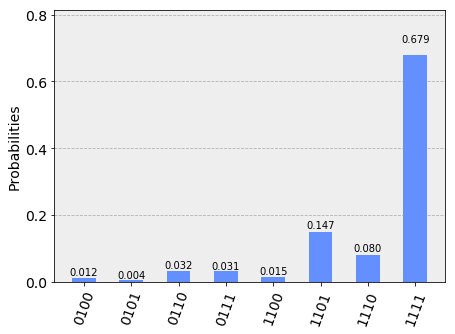

In [5]:
def ctlUn(qci, c, t, p, n):
    for i in range(n):
        qci.u1(-p, t)
        qci.cx(c, t)
        qci.u1(p, t)
        qci.cx(c, t)

def ctlUnb(qci, c, t, p, n):
    for i in range(n):
        qci.cu1(-p, c, t)
        
def iqft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(-pi/float(2**(i-j)),q[j], q[i])
        qci.h(q[i])

def swap(qci, s1, s2):
    qci.cx(s1, s2)
    qci.cx(s2, s1)
    qci.cx(s1, s2)

n = 4
phase = 14.0*pi/8.0
qr = QuantumRegister(n, 'qr')
ur = QuantumRegister(1, 'ur')
c = ClassicalRegister(n)
qc = QuantumCircuit(qr, ur, c)

for i in range(n):
    qc.h(qr[i])

for i in range(n):
    ctlUn(qc, qr[n-1-i], ur[0], phase, i+1)

iqft(qc, qr, n)
swap(qc, qr[0], qr[2])

qc.measure(qr, c)

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [6]:
theta=2*pi*(1/2+1/4+1/8)
print(theta)

5.497787143782138


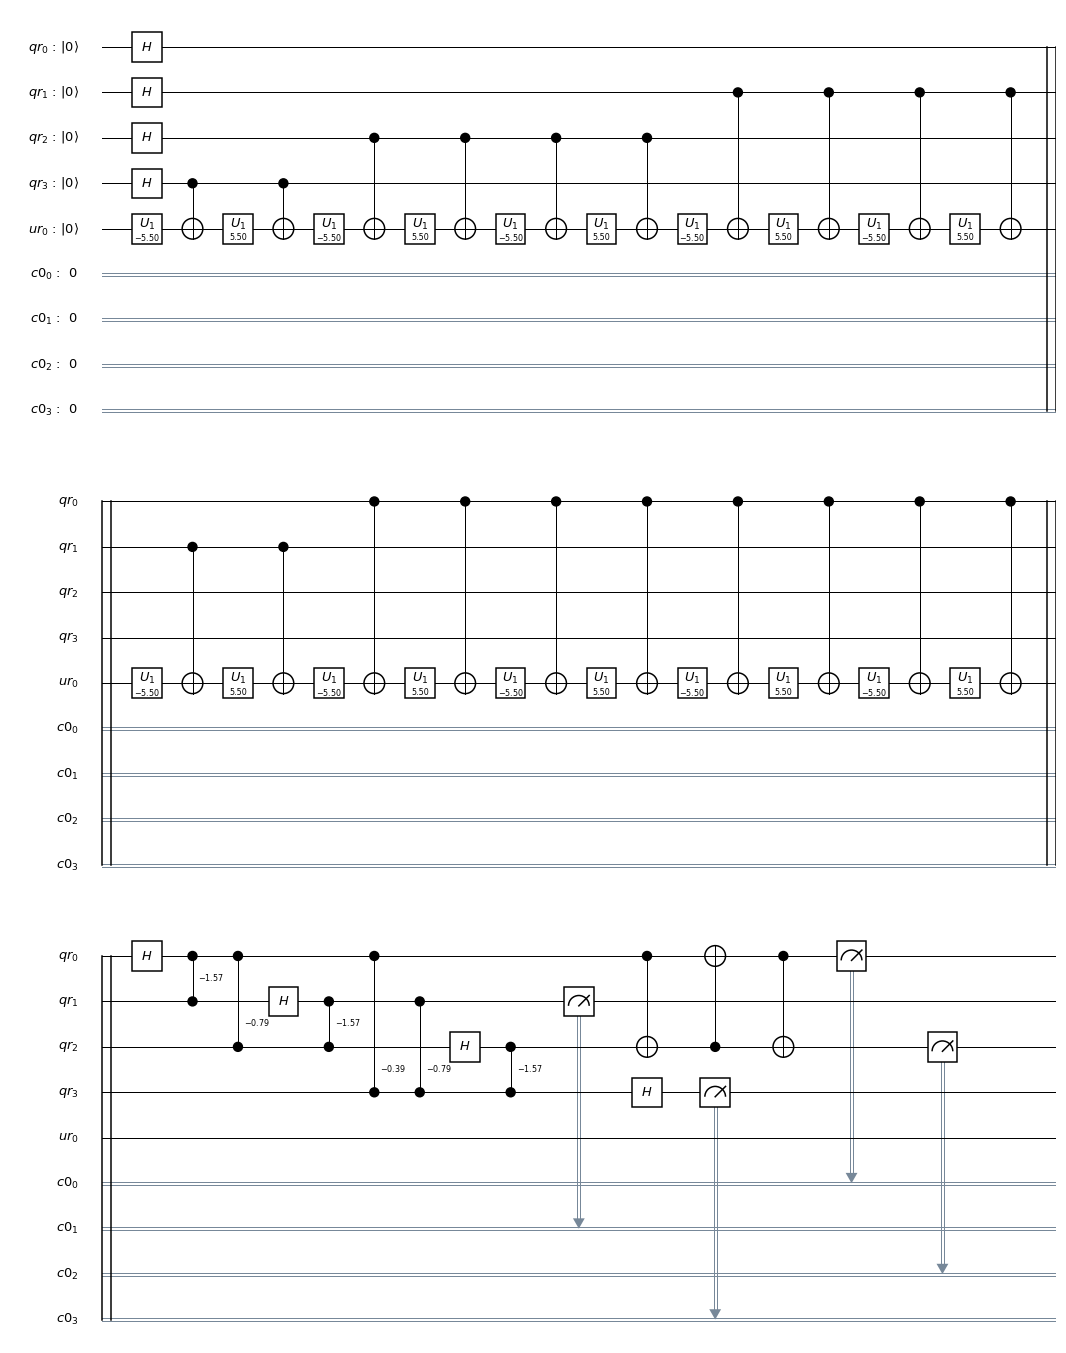

In [7]:
qc.draw(output='mpl', plot_barriers=False)

In [8]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

In [ ]:
result_exp = job_exp.result()
print(result_exp)

In [ ]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

In [ ]:
#job_get=backend.retrieve_job(jobID)
#job_get.result().get_counts(qc)

In [58]:
api = IBMQuantumExperience(token)
api.get_my_credits()

{'maxUserType': 15, 'promotional': 0, 'remaining': 15}

In [8]:
#api.get_last_codes()

In [33]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q18[4];
qreg q19[1];
creg c[4];
h q18[0];
h q18[1];
h q18[2];
h q18[3];
x q19[0];
h q19[0];
cx q18[0],q19[0];
cx q18[2],q19[0];
cx q18[3],q19[0];
barrier q18[0],q18[1],q18[2],q18[3],q19[0];
h q18[0];
h q18[1];
h q18[2];
h q18[3];
h q19[0];
barrier q18[0],q18[1],q18[2],q18[3],q19[0];
measure q18[0] -> c[0];
measure q18[1] -> c[1];
measure q18[2] -> c[2];
measure q18[3] -> c[3];

